# <div style='text-align:center; font-family:arial'>🏨Hotel Reservation EDA📈</div>

## Pendahuluan

Analisis permintaan reservasi hotel adalah proses mengevaluasi volume dan pola pemesanan kamar hotel sepanjang waktu.

Analisis ini membantu manajer hotel untuk memahami permintaan kamar mereka, memprediksi tren masa depan, dan membuat keputusan yang terinformasi tentang harga kamar, manajemen inventori, dan strategi pemasaran.

Dengan menganalisis faktor seperti tanggal pemesanan, durasi menginap, tipe kamar, dan segmen pasar, manajer hotel dapat mengidentifikasi area kekuatan dan kelemahan dalam operasi mereka dan membuat perbaikan yang didorong data untuk memaksimalkan pendapatan dan kepuasan pengunjung.

### 1. Importing Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing Dataset

Di sini kita membaca database menggunakan nama "df" dalam variabel.

In [80]:
df = pd.read_csv("Hotel Reservations.csv")

Di sini kita dapat melihat bahwa kita memiliki variabel kategorik dan variabel kontinu, kita juga dapat melihat bahwa kita memiliki kolom Booking ID yang kemungkinan tidak akan digunakan, kita juga dapat melihat bahwa kita tidak memiliki nilai null.

Berikut adalah penjelasan tentang variabel-variabel tersebut:

- Booking_ID: identifikasi unik dari setiap pemesanan
- no_of_adults: Jumlah orang dewasa
- no_of_children: Jumlah anak-anak
- no_of_weekend_nights: Jumlah malam akhir pekan (Sabtu atau Minggu) pengunjung menginap atau memesan untuk menginap di hotel
- no_of_week_nights: Jumlah malam minggu (Senin hingga Jumat) pengunjung menginap atau memesan untuk menginap di hotel
- type_of_meal_plan: Tipe paket makan yang dipesan oleh pelanggan:
- required_car_parking_space: Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1- Ya)
- room_type_reserved: Tipe kamar yang dipesan oleh pelanggan. Nilainya dienkripsi (di-encode) oleh INN Hotels.
- lead_time: Jumlah hari antara tanggal pemesanan dan tanggal kedatangan
- arrival_year: Tahun tanggal kedatangan
- arrival_month: Bulan tanggal kedatangan
- arrival_date: Tanggal dalam sebulan
- market_segment_type: Designasi segmentasi pasar.
- repeated_guest: Apakah pelanggan pengunjung yang pernah datang sebelumnya? (0 - Tidak, 1- Ya)
- no_of_previous_cancellations: Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini
- no_of_previous_bookings_not_canceled: Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini
- avg_price_per_room: Rata-rata harga per hari dari pemesanan; harga kamar bersifat dinamis. (dalam euro)
- no_of_special_requests: Jumlah permintaan khusus yang diajukan oleh pelanggan (misalnya lantai tinggi, pemandangan dari kamar, dll)
- booking_status: Bendera yang menunjukkan apakah pemesanan dibatalkan atau tidak

Menampilkan 5 baris data pertama:

In [81]:
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Menampilkan tipe data dan jumlah data yang kosong:

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Menampilkan statistika deskriptif:

In [83]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### 2. Data Analysis. 

Memverivikasi korelasi antara variabel.

- Dapat dilihat bahwa tidak ada korelasi yang kuat antar variabel.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4992\397201543.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<AxesSubplot: >

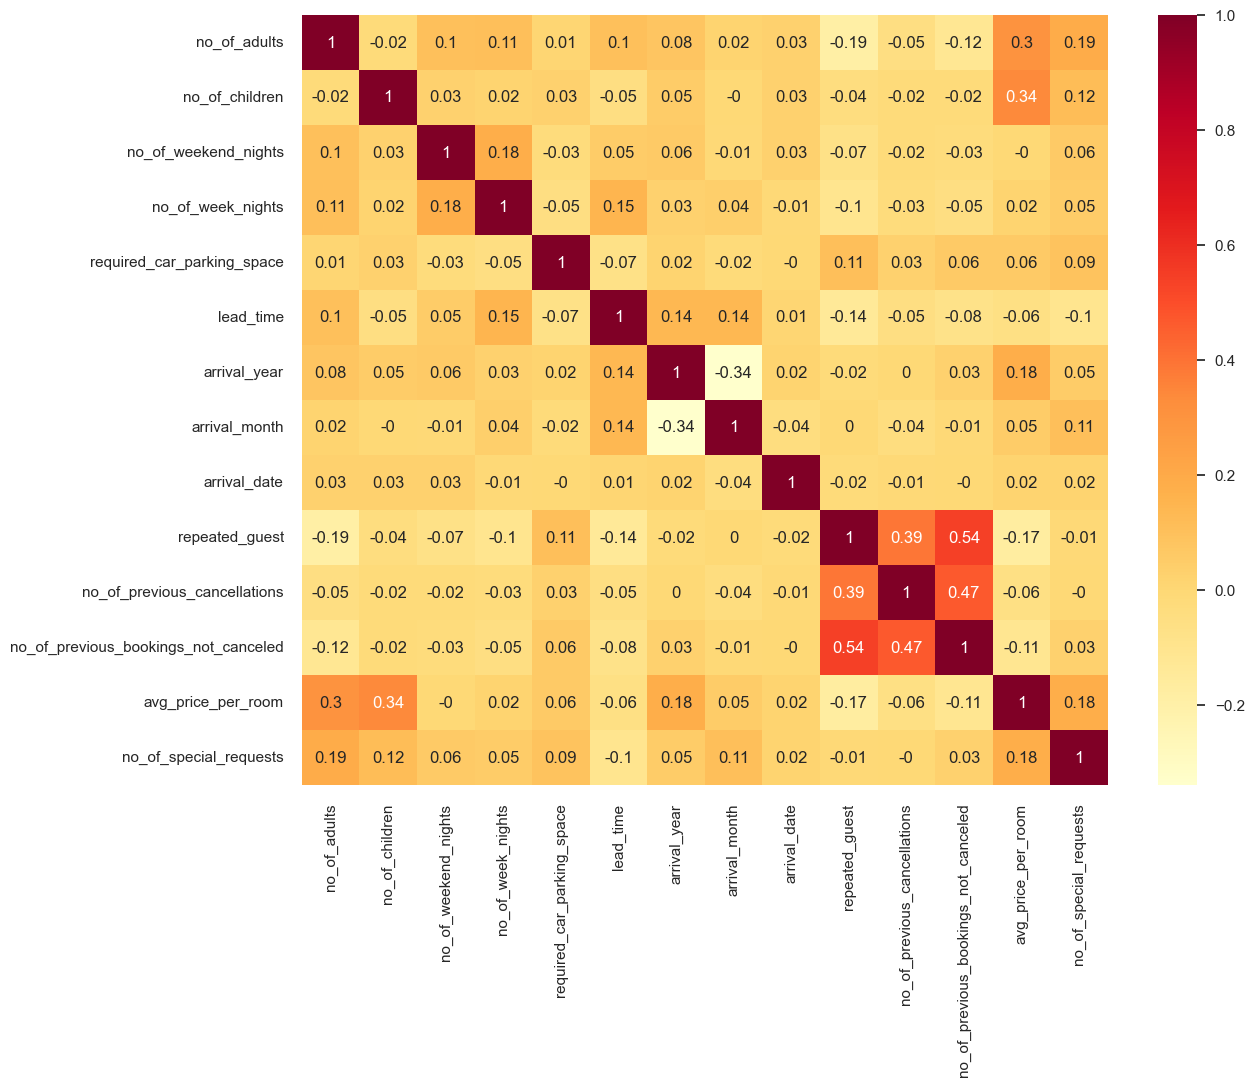

In [84]:
correlation = df.corr().round(2)
plt.figure(figsize = (13,10))
sns.heatmap(correlation, annot = True, cmap = 'YlOrRd')

Berdasarkan analisis variabel kategorik, dapat diketahui bahwa kebanyakan pemesanan kamar dilakukan untuk dua orang dewasa tanpa anak. Secara umum, pemesanan bersifat jangka pendek, hanya sebagian kecil yang bersifat jangka panjang. Kebanyakan pemesanan memilih meal_plan_1 dan tidak memerlukan tempat parkir. Tipe kamar yang paling sering dipesan adalah tipe 1 dan 4, dan data yang terkumpul sebagian besar berasal dari pemesanan tahun 2018.

<AxesSubplot: title={'center': 'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

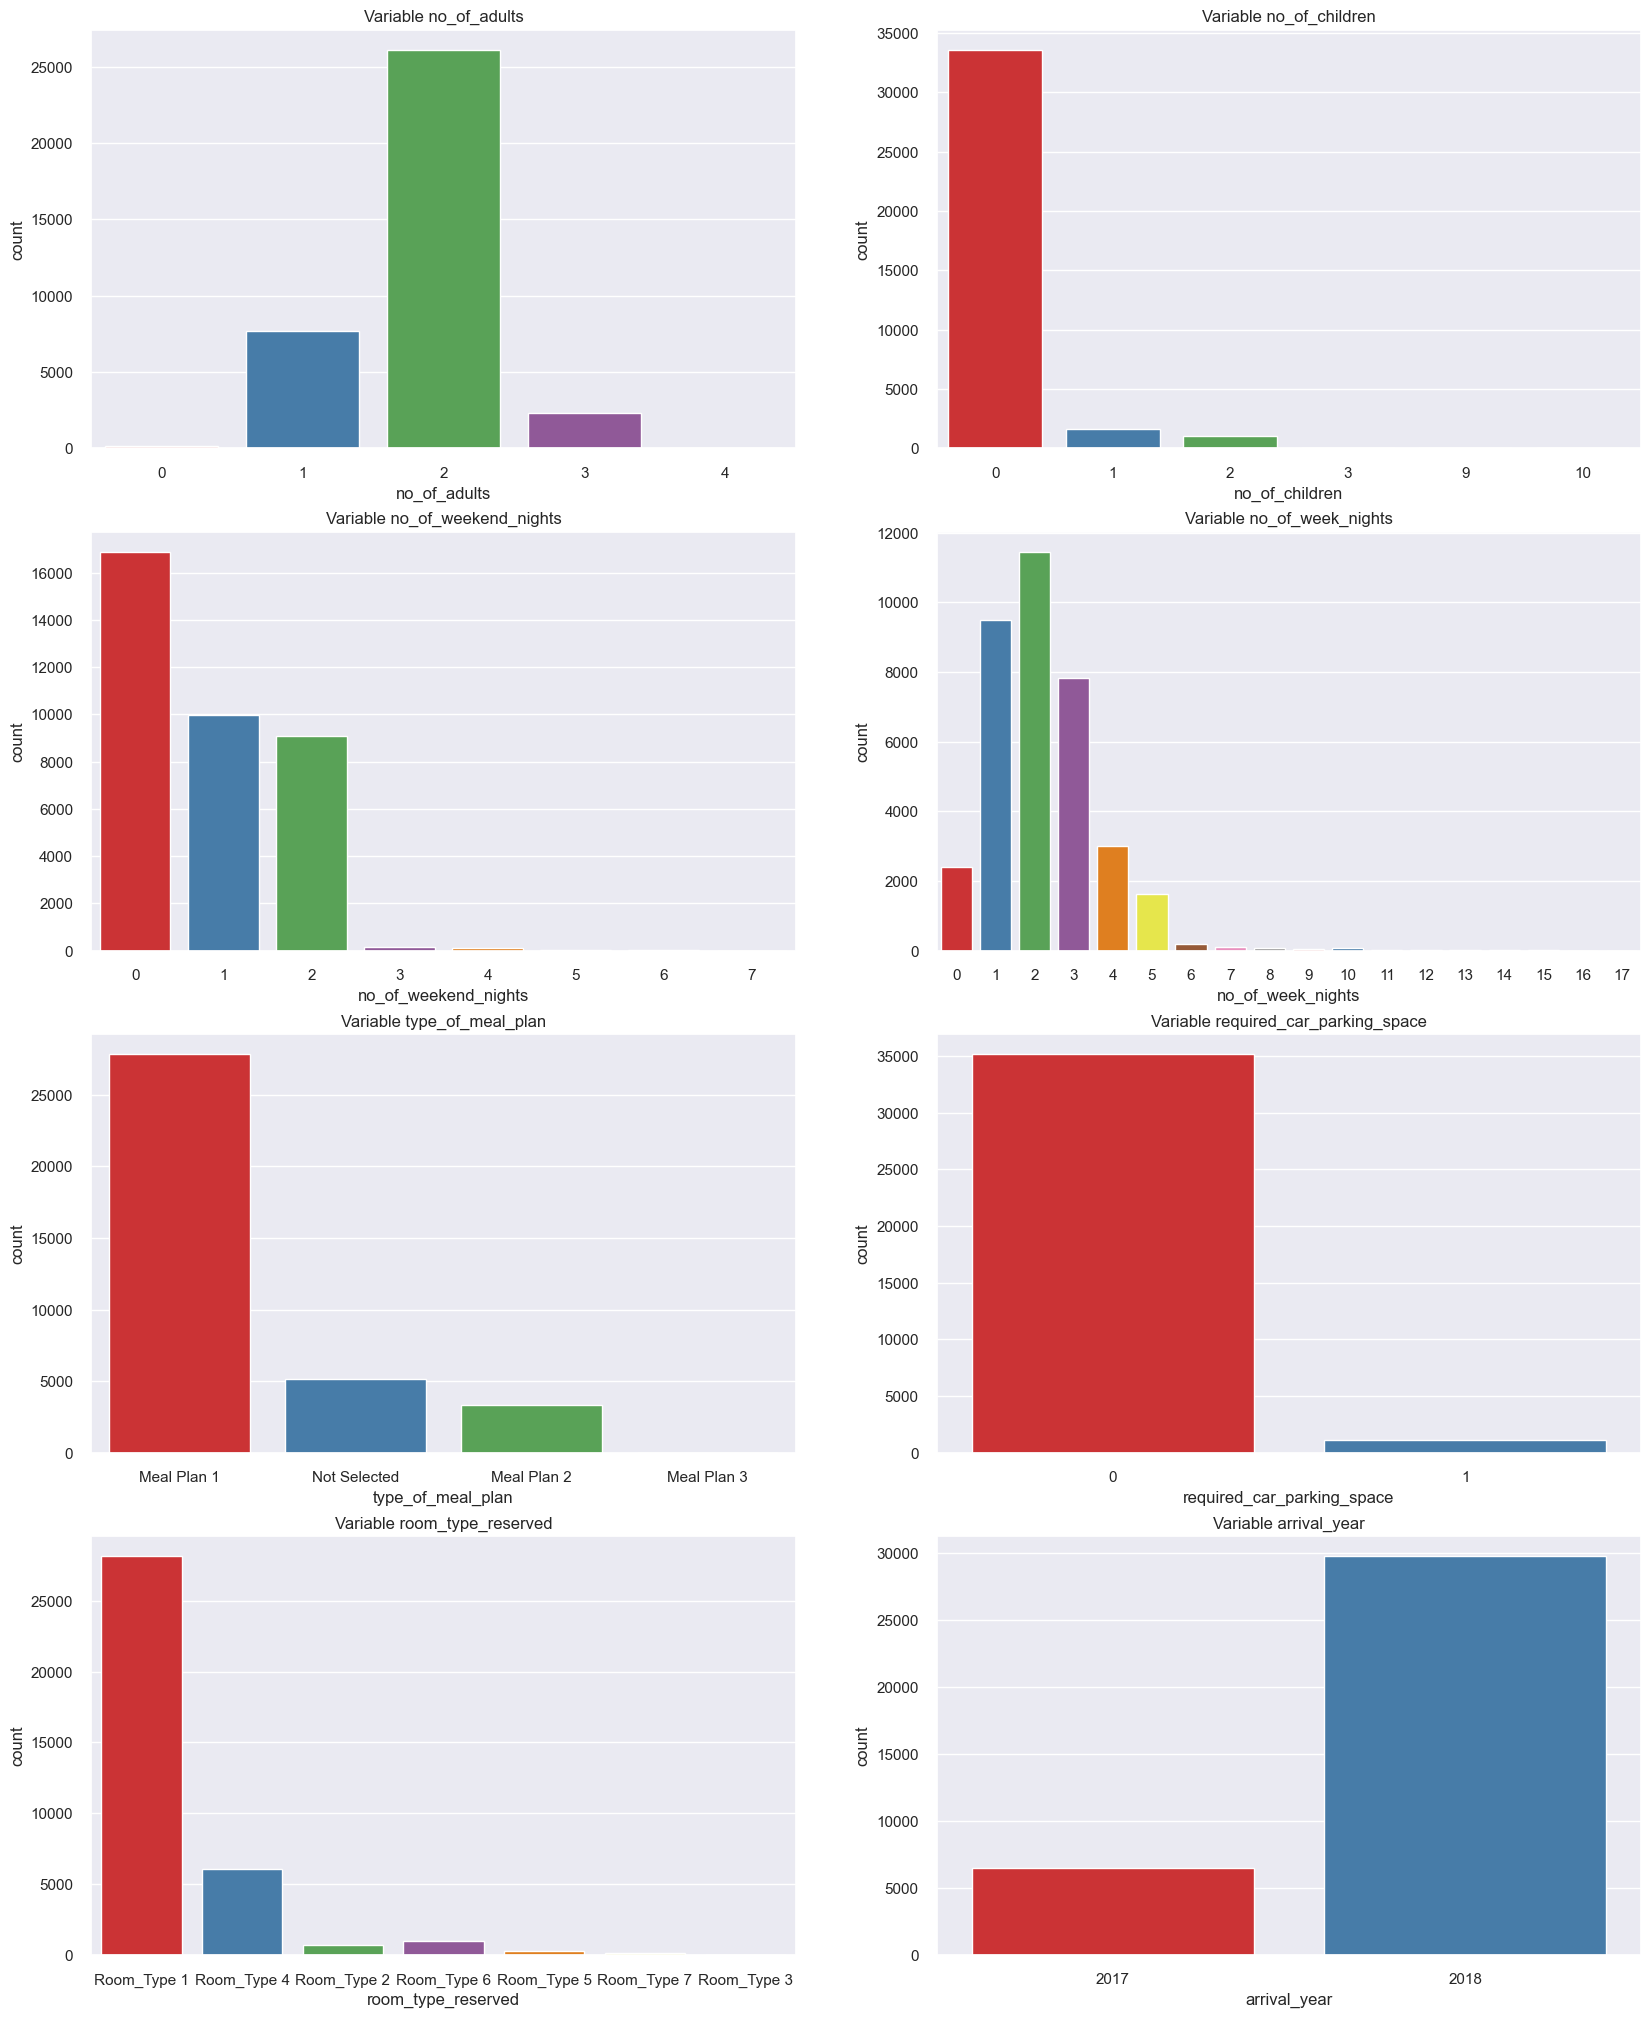

In [85]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set1', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set1', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set1', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set1', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set1', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set1', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set1', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set1', data = df)

Dapat diamati bahwa terjadi peningkatan dalam pemesanan berdasarkan periode bulanan. Dalam periode Januari hingga Oktober, terdapat pertumbuhan yang bersifat gradual, namun pada bulan November dan Desember terjadi penurunan. Mayoritas pemesanan dilakukan secara online dan mayoritas pengunjung adalah mereka yang belum pernah mengunjungi hotel sebelumnya, sekaligus tidak pernah melakukan pembatalan pemesanan. Semakin tinggi permintaan khusus, semakin sedikit data yang tersedia. Dari variabel target yang diamati, diperkirakan bahwa 65% dari reservasi belum dibatalkan.

<AxesSubplot: title={'center': 'Variable booking_status'}, xlabel='booking_status', ylabel='count'>

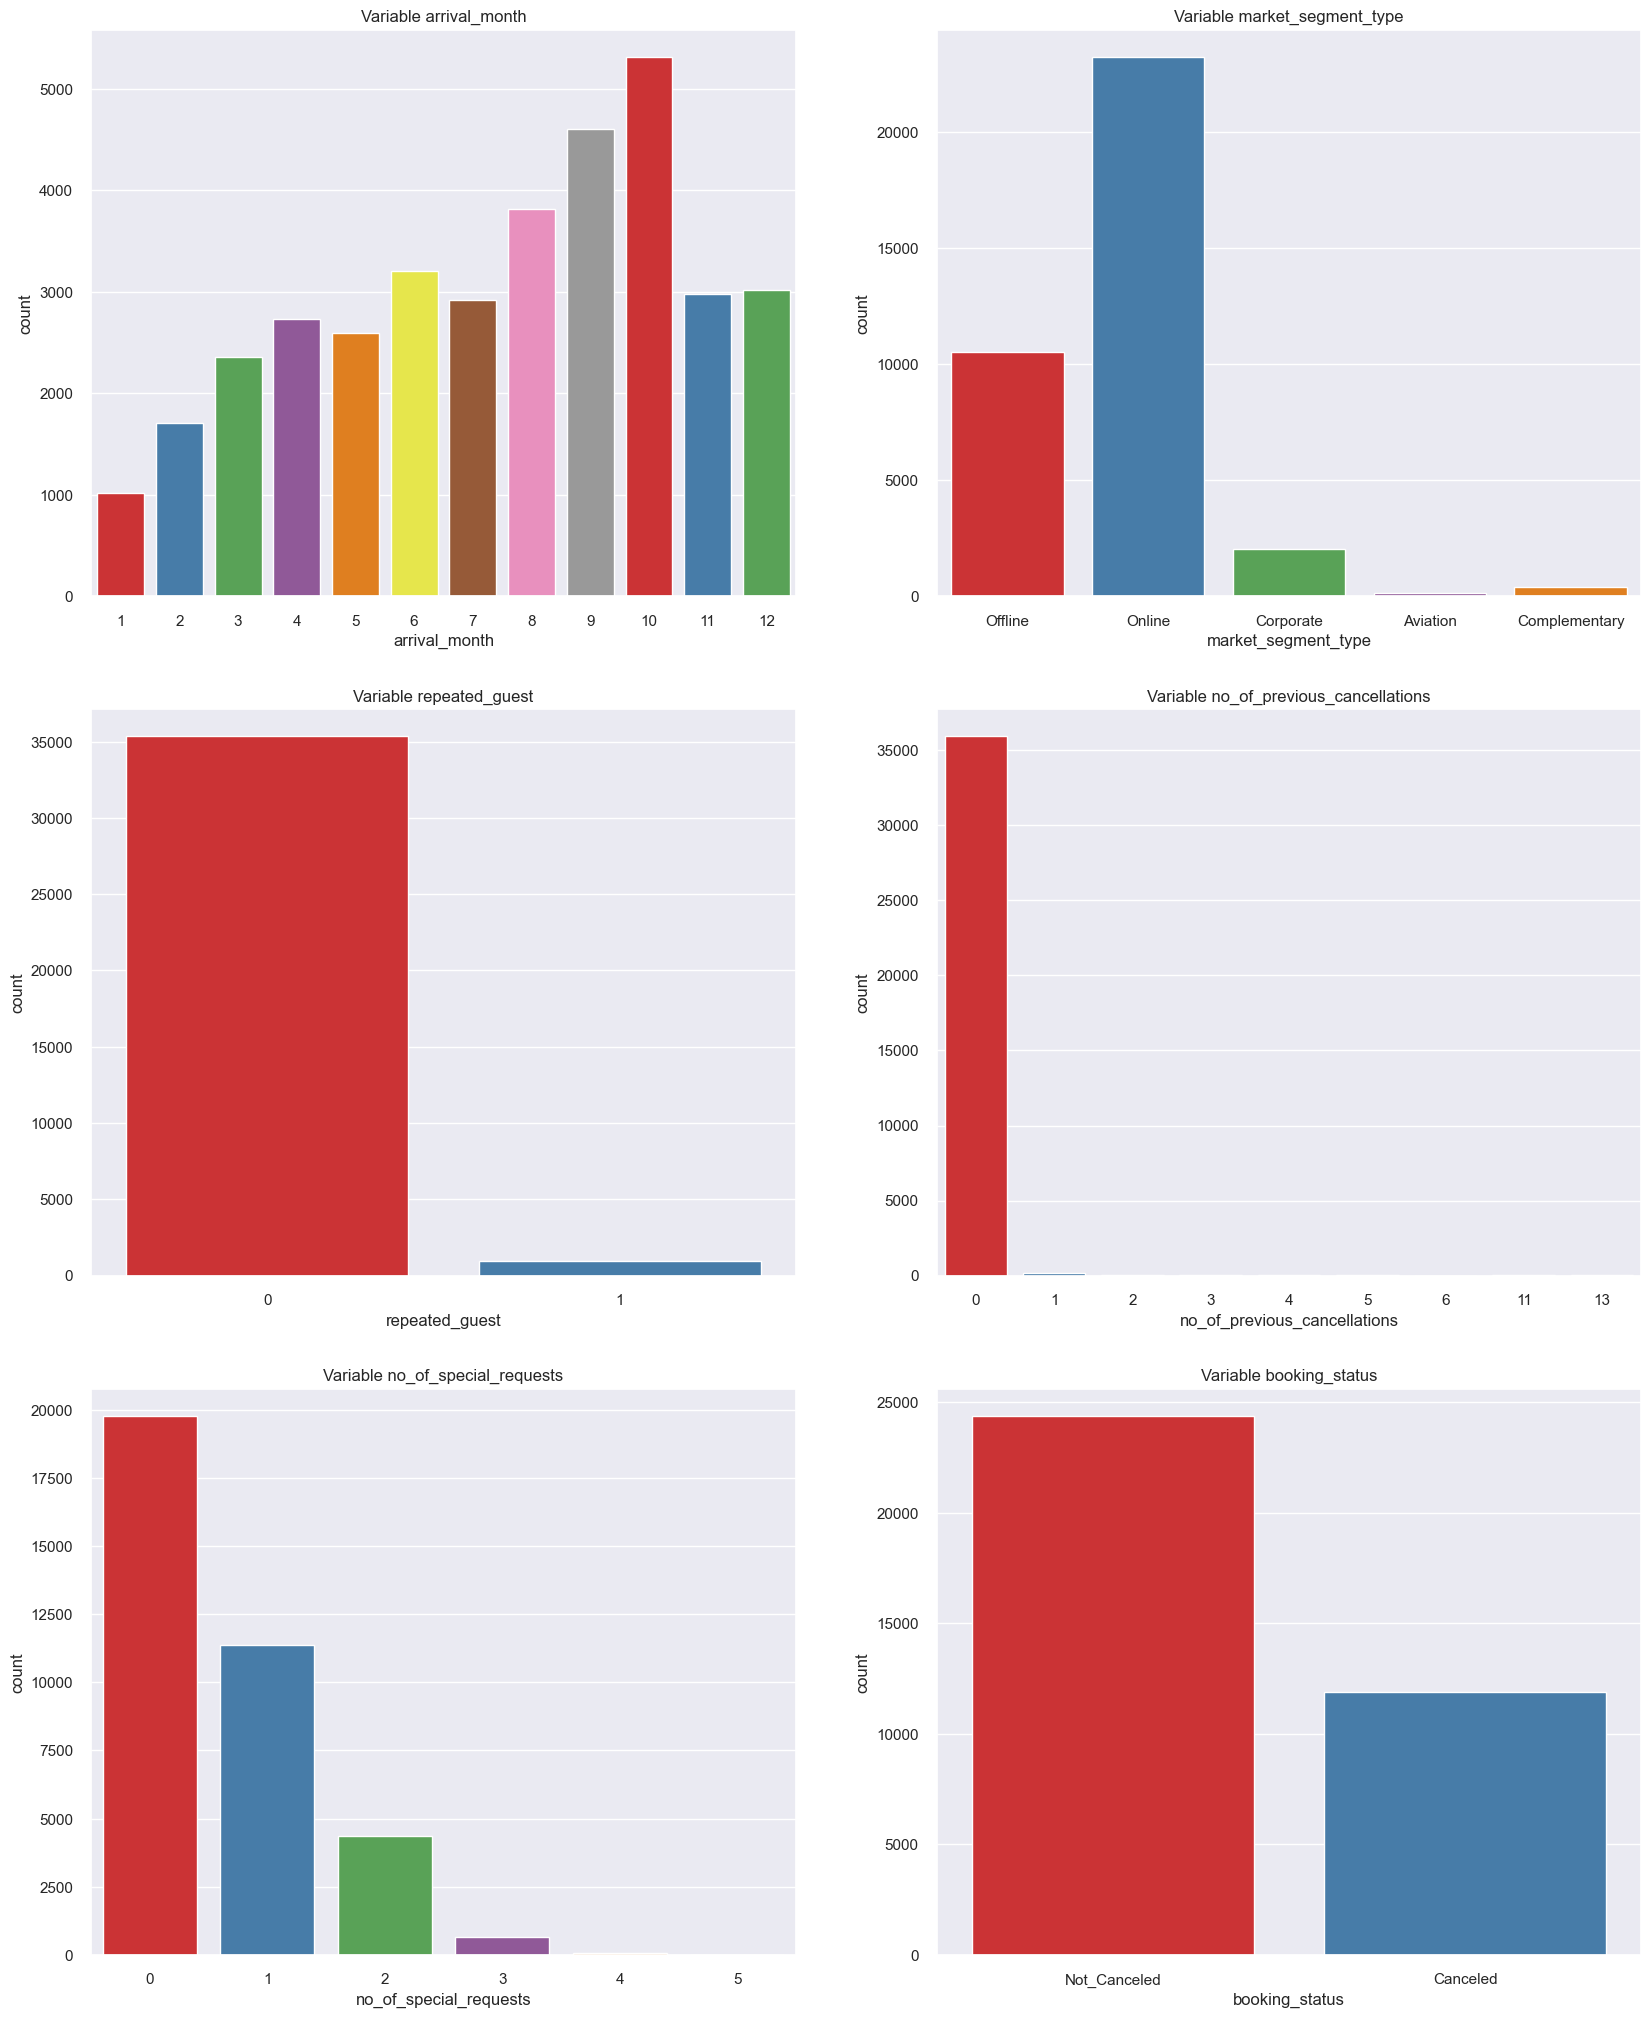

In [86]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set1', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set1', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set1', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set1', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set1', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set1', data = df)

#### Variabel Kontinu
Dari variabel kontinu, dapat diamati bahwa pemesanan dilakukan tanpa memakan waktu yang lama. Semakin lama waktu yang diambil, maka jumlah pemesanan semakin sedikit. Puncak data biasanya berada pada harga rata-rata kamar 100 euro dan pengunjung jarang membatalkan pemesanan.

<AxesSubplot: xlabel='no_of_previous_bookings_not_canceled', ylabel='Count'>

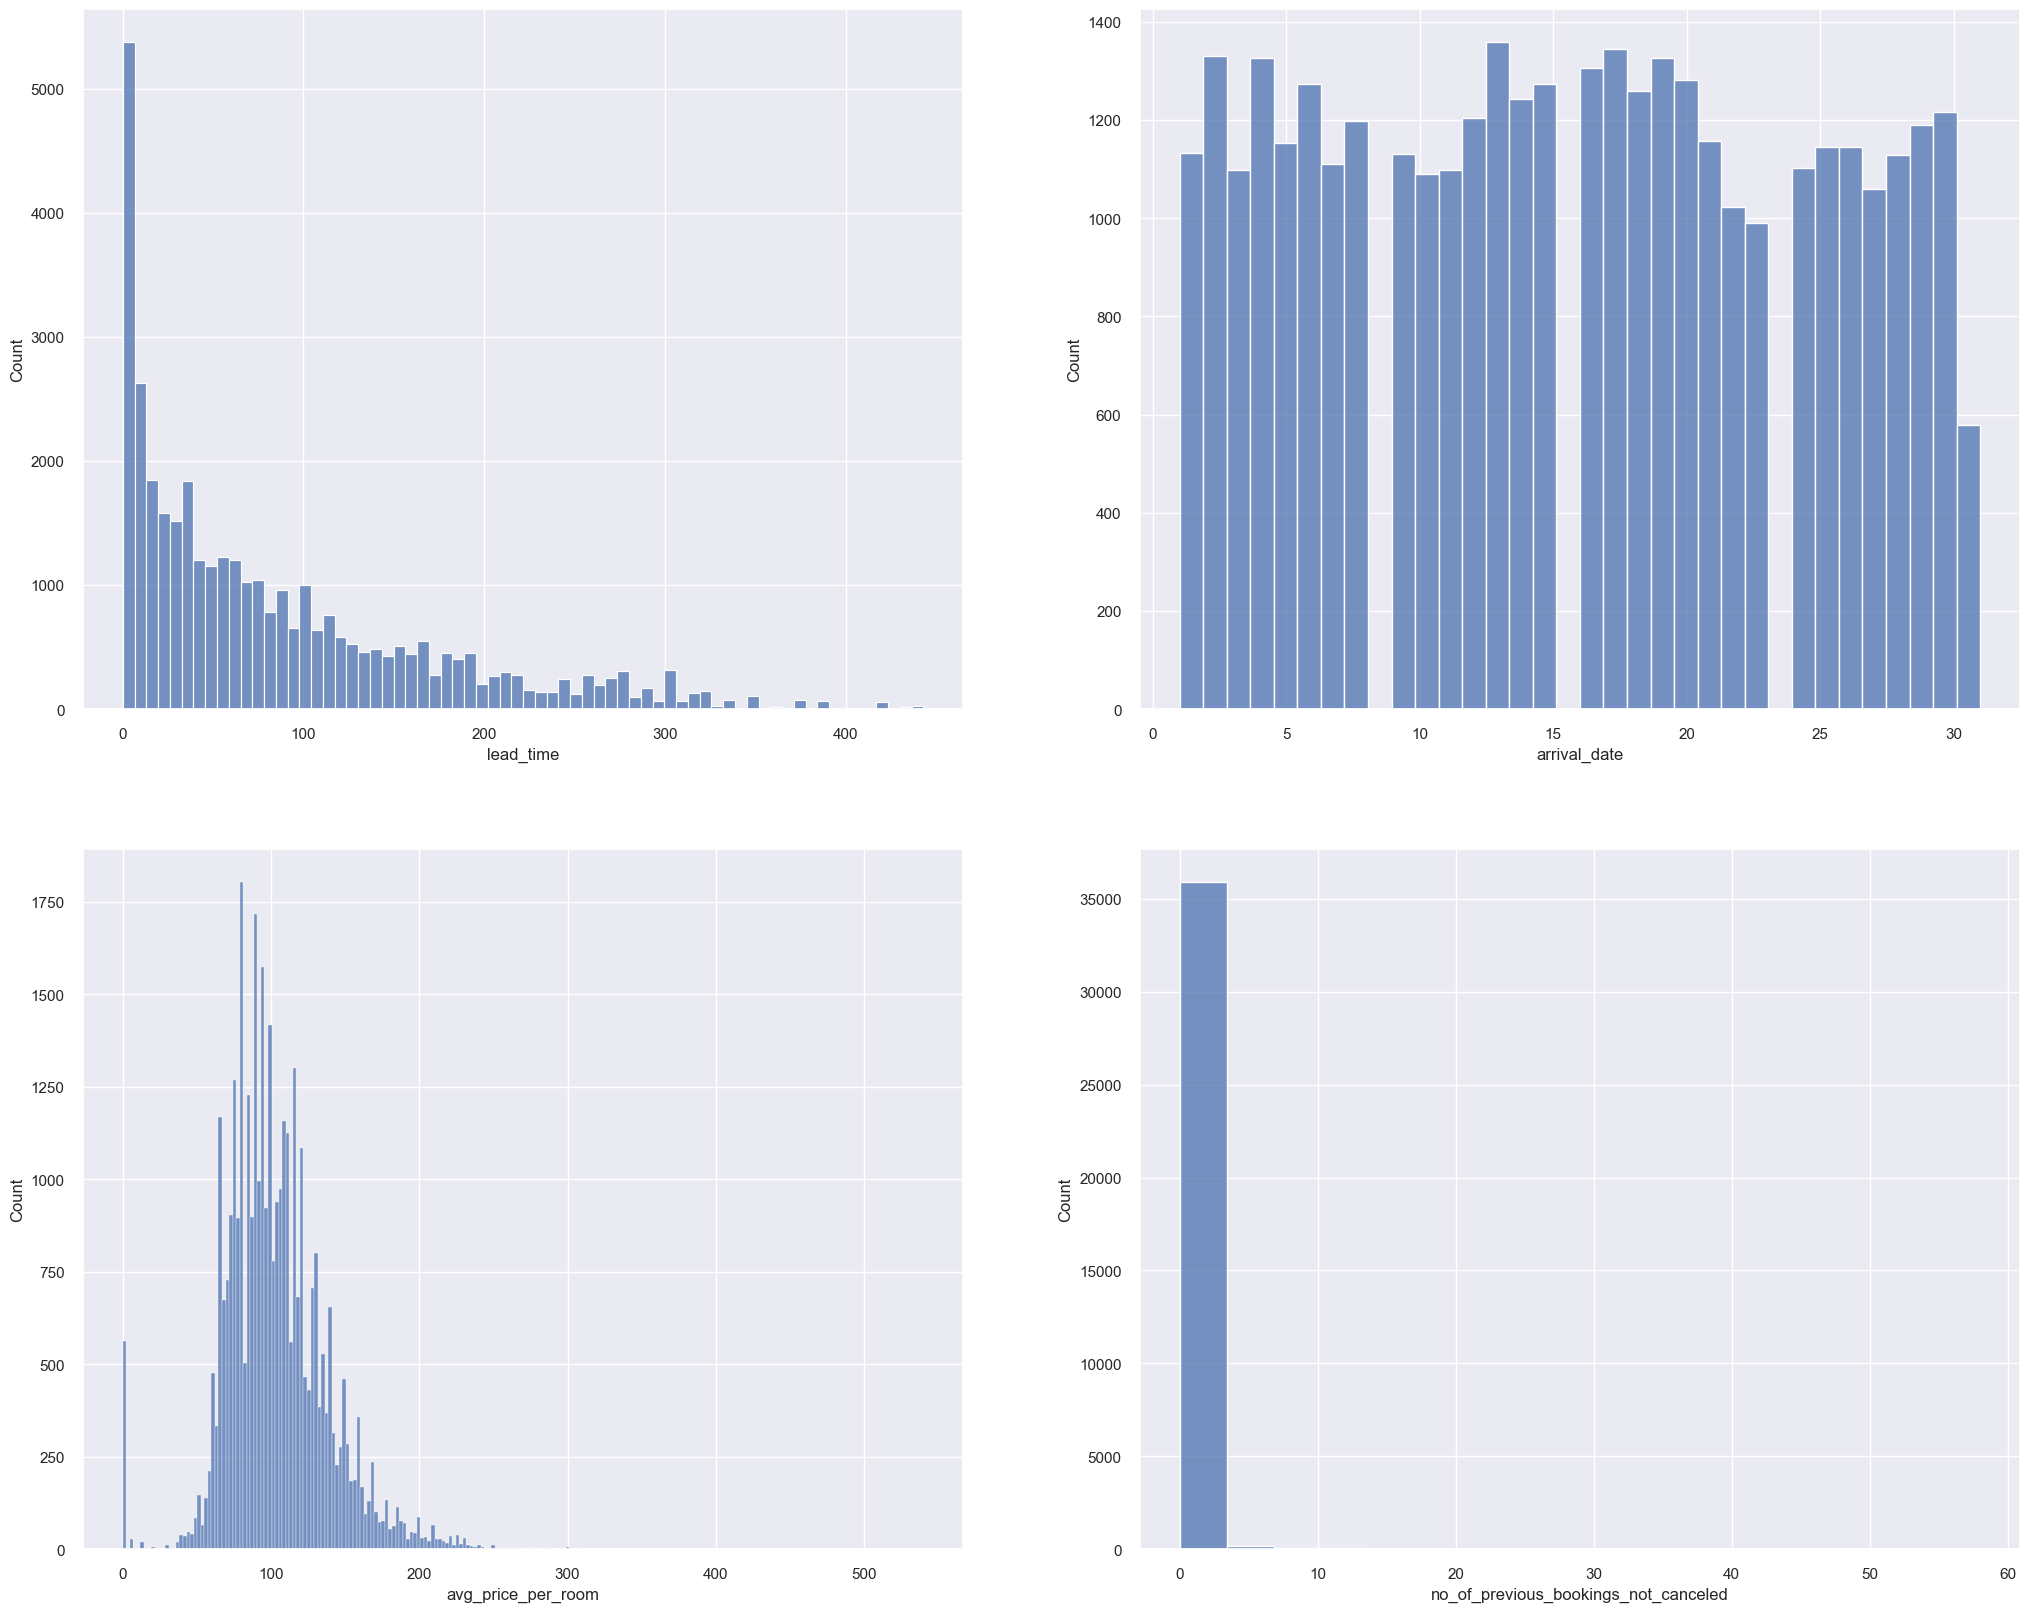

In [87]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['arrival_date'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,4)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)

Beberapa outlier dapat diamati saat memeriksa Boxplots, namun saat ini tidak akan kita ditangani.

<AxesSubplot: title={'center': 'Boxplot lead_time'}, xlabel='lead_time'>

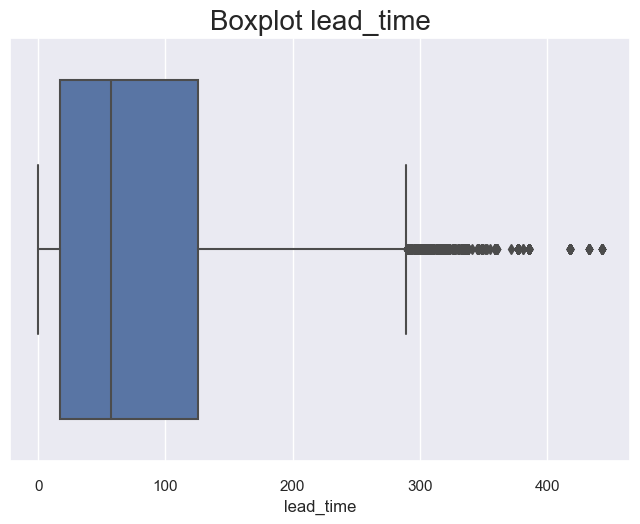

In [88]:
plt.title("Boxplot lead_time", fontdict = {'fontsize': 20})
sns.boxplot(x=df["lead_time"])

<AxesSubplot: title={'center': 'Boxplot avg_price_per_room'}, xlabel='avg_price_per_room'>

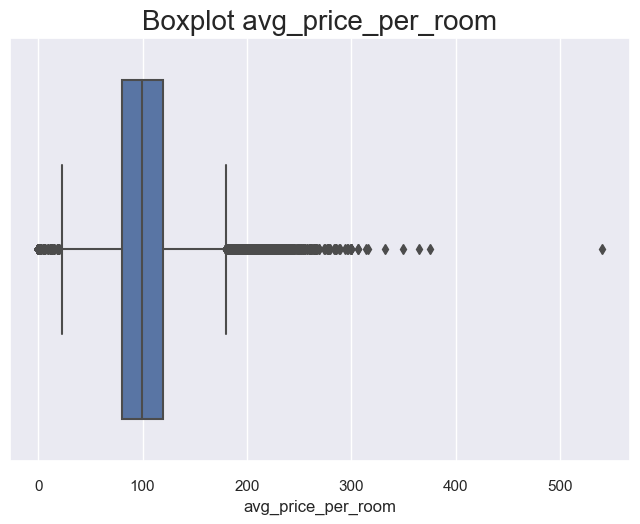

In [89]:
plt.title("Boxplot avg_price_per_room", fontdict = {'fontsize': 20})
sns.boxplot(x=df["avg_price_per_room"])

#### Analisis Bivariat

Dengan memperhatikan variabel target, kita dapat diamati beberapa hal. Secara umum, pengunjung yang meminta tempat parkir, pengunjung yang pernah menginap, dan pengunjung yang meminta permintaan khusus jarang membatalkan pemesanan. Semakin banyak permintaan, semakin kecil kemungkinan pembatalan. Distorsi terbesar yang kita lihat disini adalah variabel Lead_Time. Semakin lama seseorang memesan kamar, semakin besar kemungkinan pembatalan, hal ini sangat masuk akal karena jika memang benar-benar membutuhkan kamar maka akan segera dipakai. Pandangan lain yang menarik adalah pada tiga bulan terakhir pada akhir tahun, biasanya pembatalan pemesanan terjadi lebih sedikit. Meskipun ada sedikit peningkatan, kita dapat melihat bahwa kamar yang lebih mahal juga mungkin mengalami pembatalan yang lebih banyak.

<AxesSubplot: xlabel='booking_status', ylabel='count'>

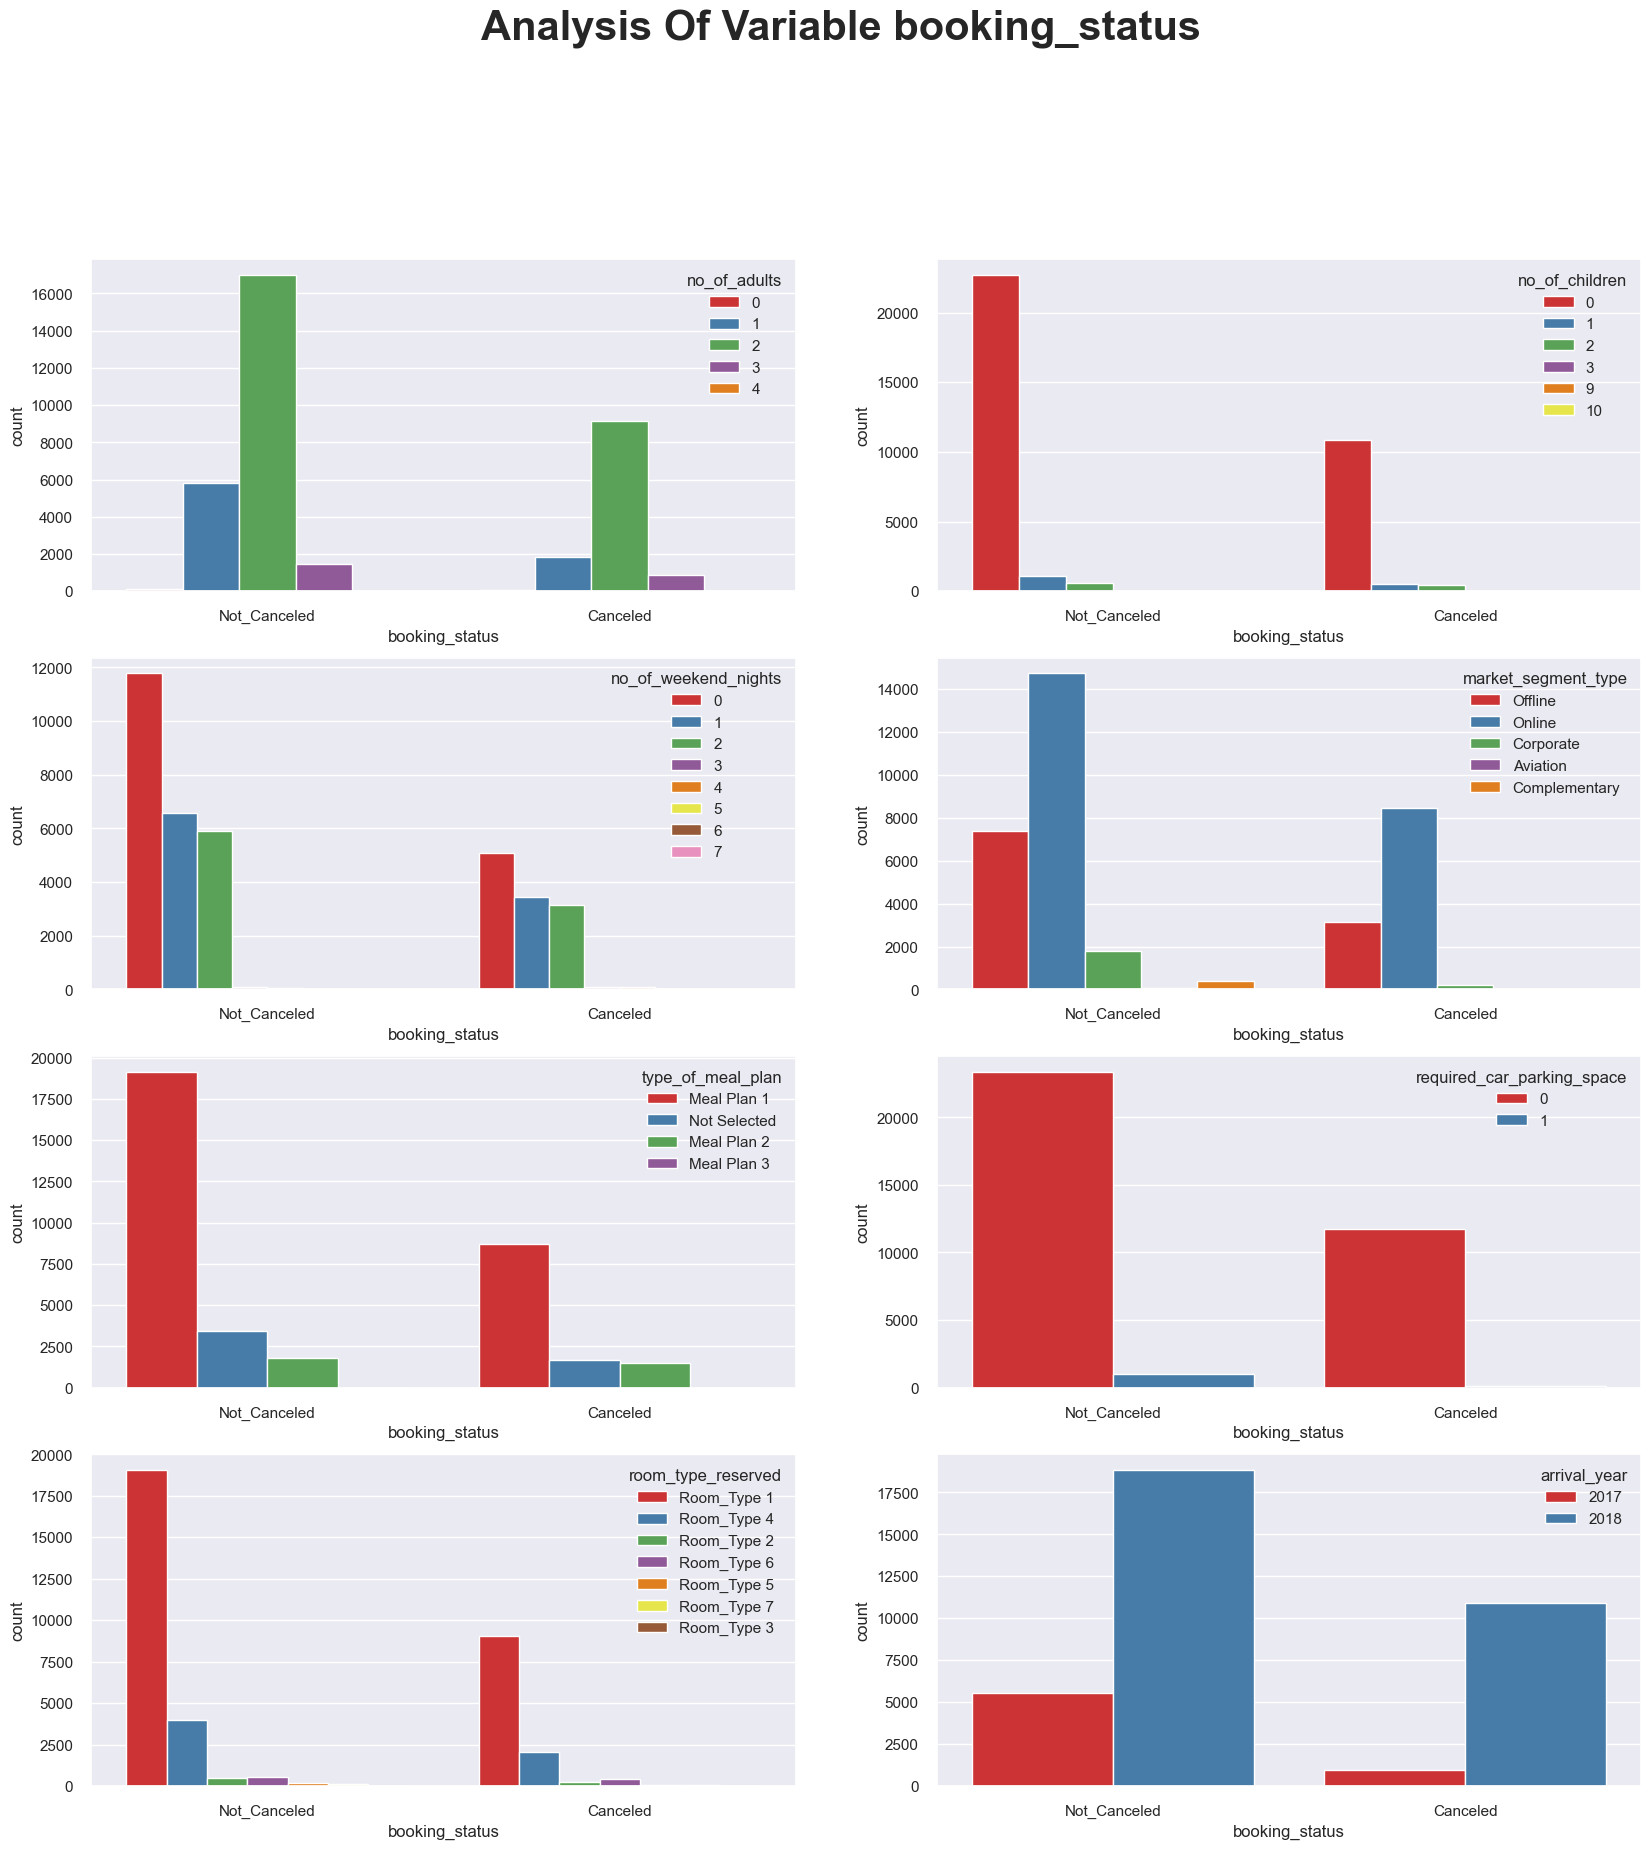

In [90]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=30)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set1', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set1', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set1', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set1', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set1', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set1', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set1', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set1', data = df)

<AxesSubplot: xlabel='avg_price_per_room', ylabel='Density'>

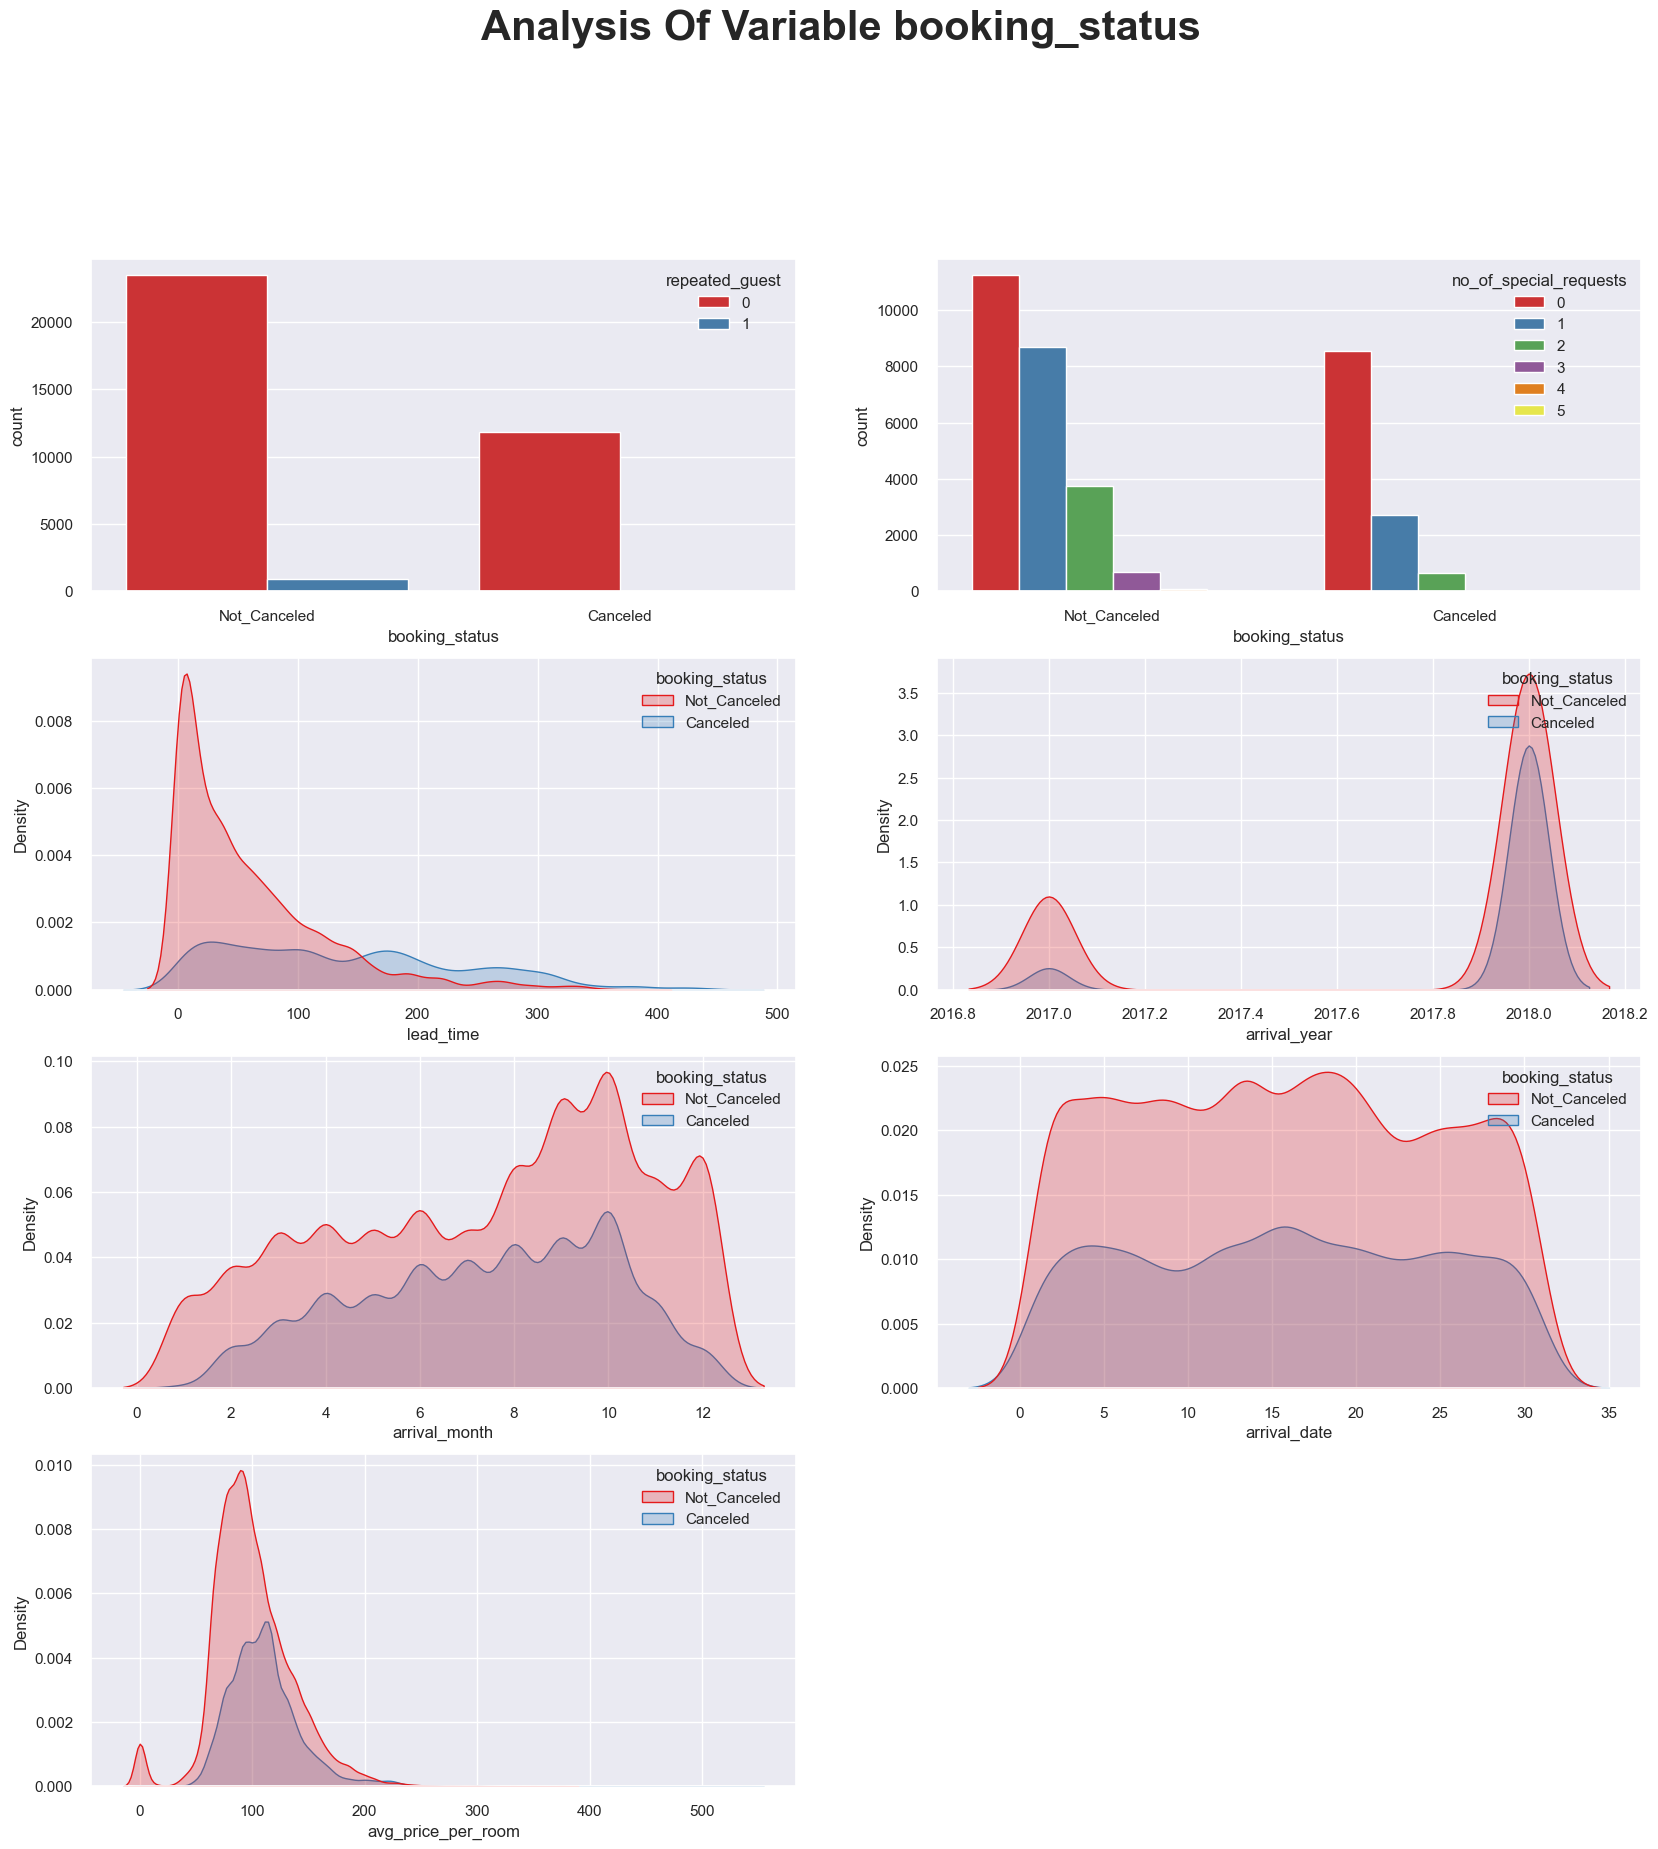

In [91]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=30)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set1', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set1', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set1', fill=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set1', fill=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set1', fill=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set1', fill=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set1', fill=True, data=df)

Sebagaimana kita lihat sebelumnya, variabel Lead Time adalah yang memiliki perbedaan terbesar antara pembatalan dan tidak pembatalan. Oleh karena itu, mari kita lihat lebih dalam. Secara umum, mereka yang meminta tempat parkir mobil memiliki lead time yang lebih singkat. Kita melihat hal yang sama dengan tamu yang sudah pernah menginap di hotel. Saat melihat variabel lain, ada beberapa yang memperhatikan kita. Variabel no_weekend_nights biasanya, mereka yang menginap selama 3 atau 4 malam memiliki lead time yang lebih panjang. Saat melihat segmen, tamu yang berada di "alasan khusus" biasanya tidak memiliki lead time yang tinggi. Saat melihat meal_plan, tamu yang menggunakan meal_plan2 biasanya memiliki lead time yang sangat tinggi. Saat melihat tipe kamar, kita melihat ada beberapa kamar yang dipilih lebih cepat dari yang lain. Dan saat melihat permintaan khusus, meskipun membutuhkan waktu, semakin banyak permintaan, lead time akan berkurang.

<AxesSubplot: xlabel='lead_time', ylabel='Density'>

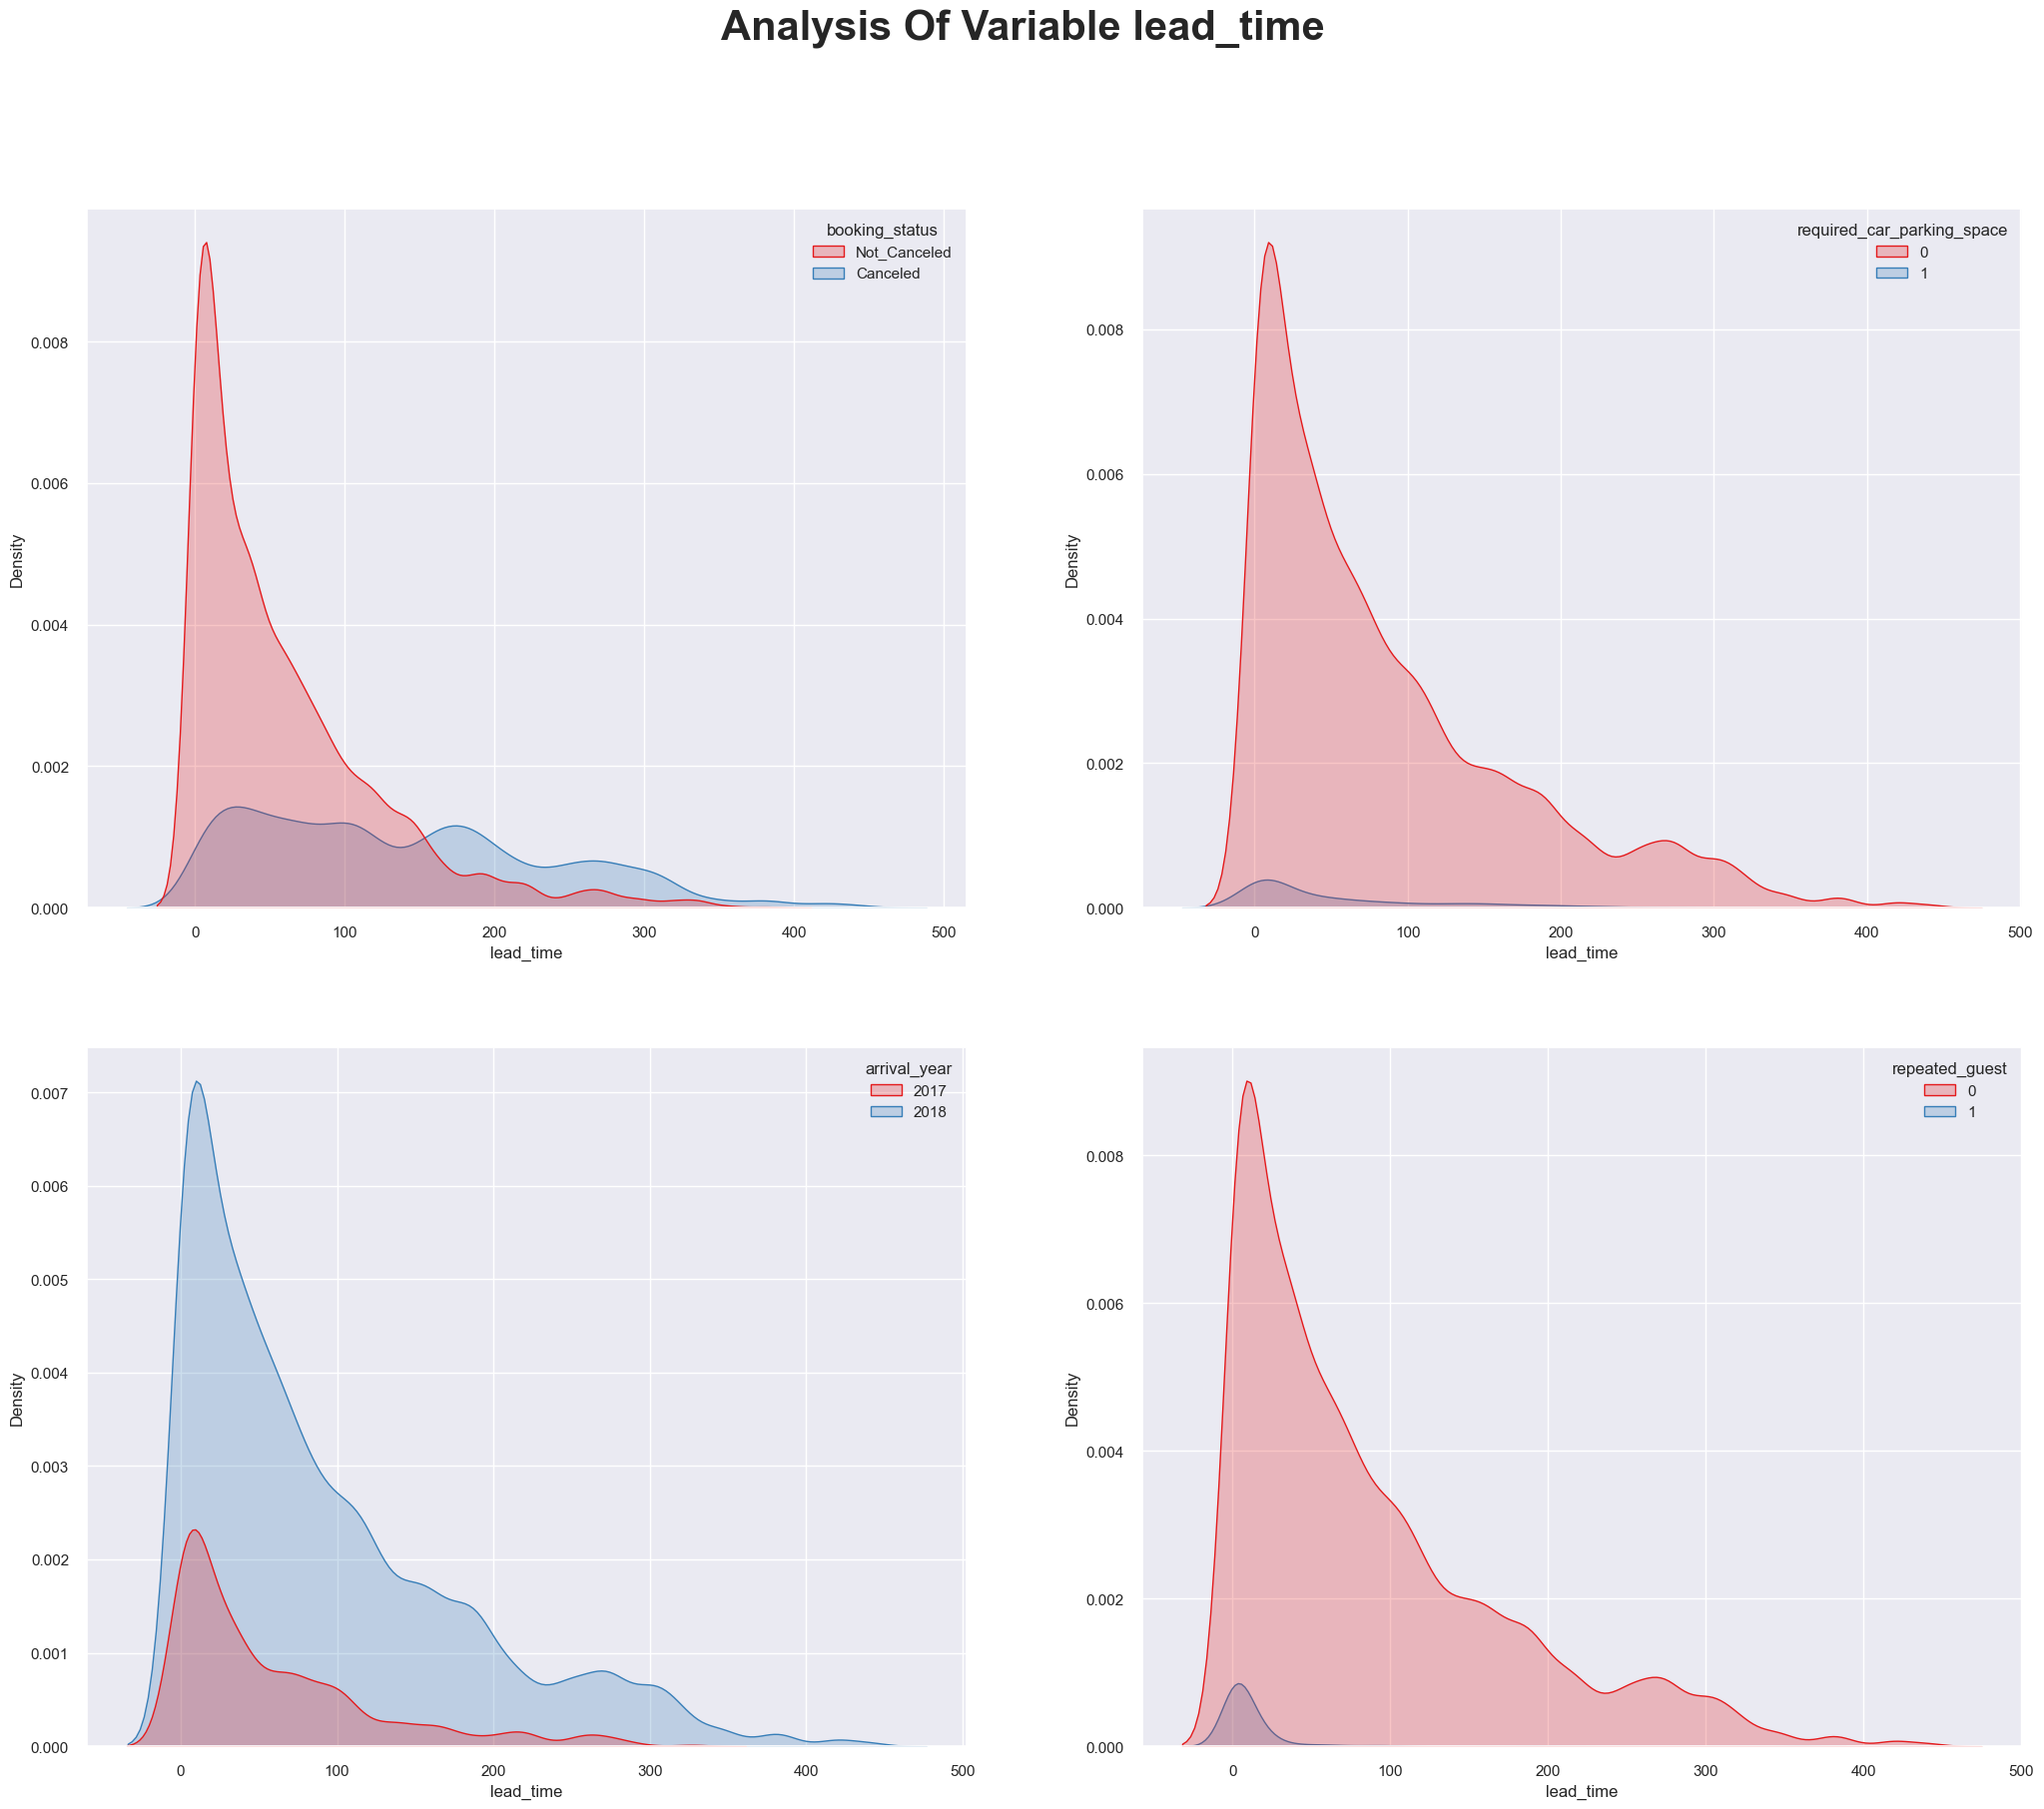

In [92]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=30)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set1', fill=True, data=df)

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Set1', fill=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Set1', fill=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Set1', fill=True, data=df)


<AxesSubplot: xlabel='no_of_special_requests', ylabel='lead_time'>

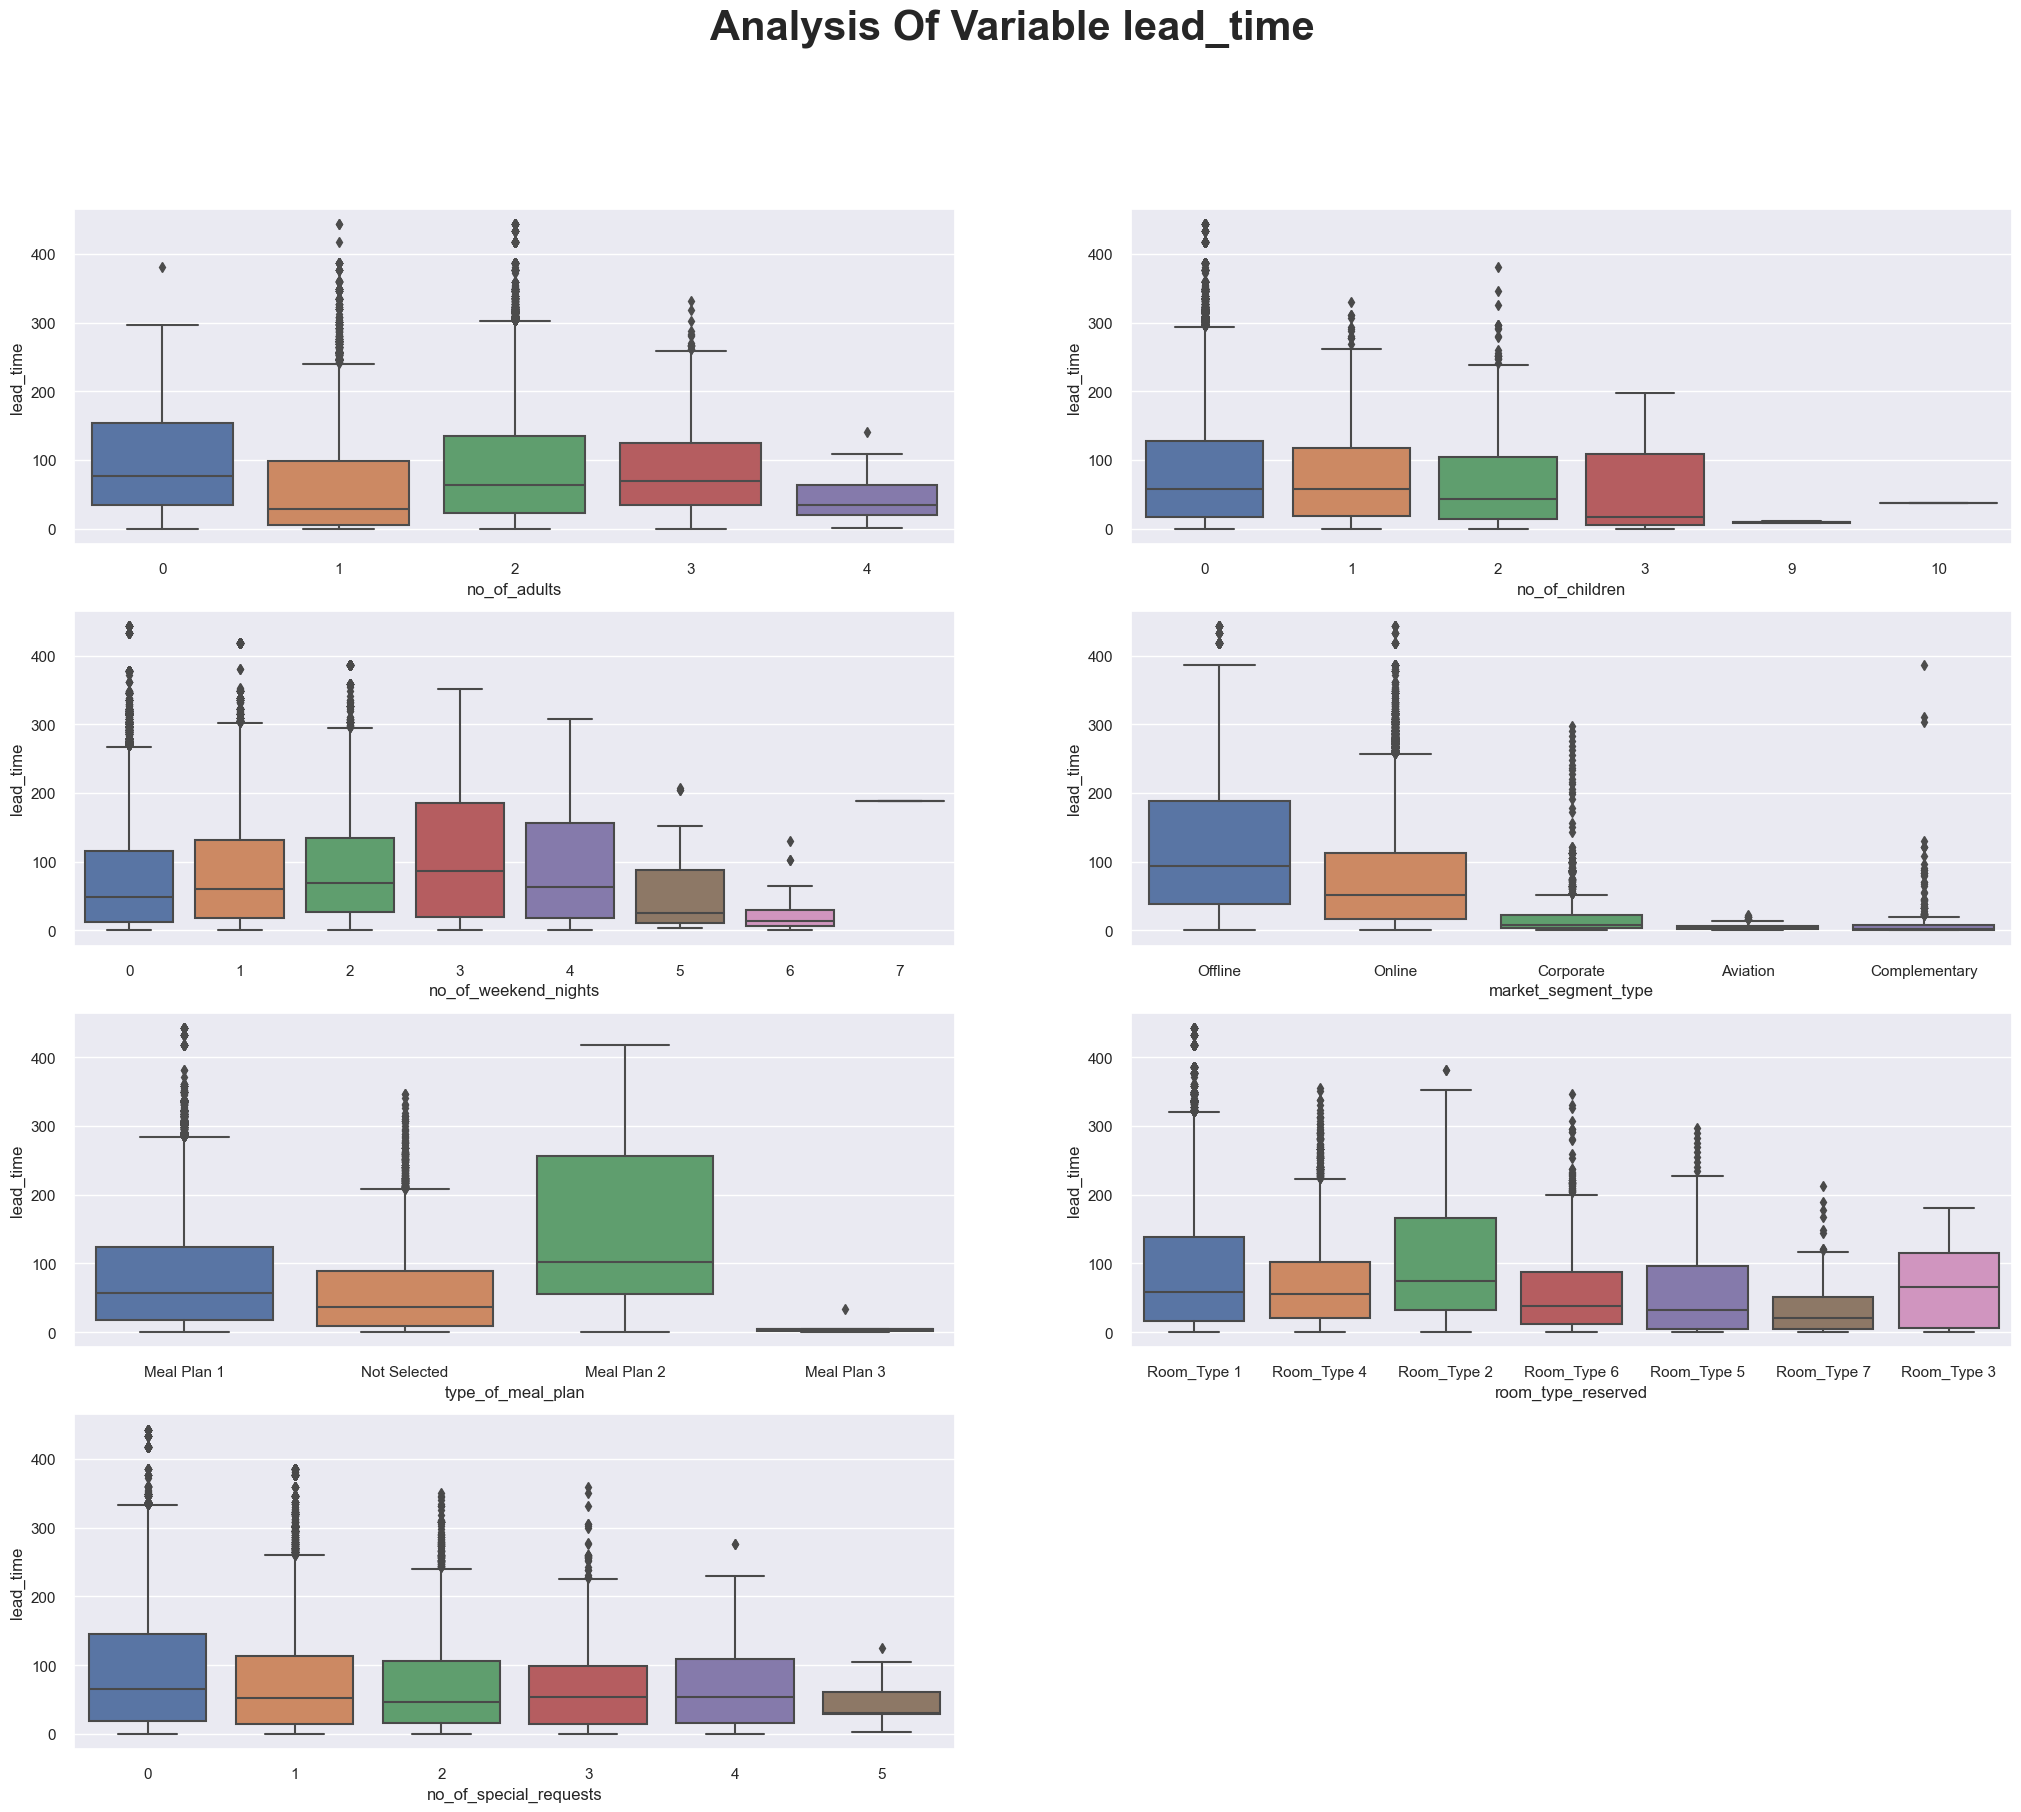

In [93]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=30)

plt.subplot(4,2,1)
sns.boxplot(x="no_of_adults", y="lead_time", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="no_of_children", y="lead_time", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="no_of_weekend_nights", y="lead_time", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="market_segment_type", y="lead_time", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="type_of_meal_plan", y="lead_time", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="room_type_reserved", y="lead_time", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="no_of_special_requests", y="lead_time", data=df)

Dapat dilihat bahwa pada awal tahun dan akhir tahun adalah bulan di mana pemesanan dilakukan lebih cepat. Saat melihat tamu yang sudah pernah membatalkan dan mereka yang belum tinggal, kita dapat melihat pola yang sama, yaitu tamu yang sudah mengenal hotel tidak memiliki lead time yang lama.

<AxesSubplot: xlabel='no_of_previous_bookings_not_canceled', ylabel='lead_time'>

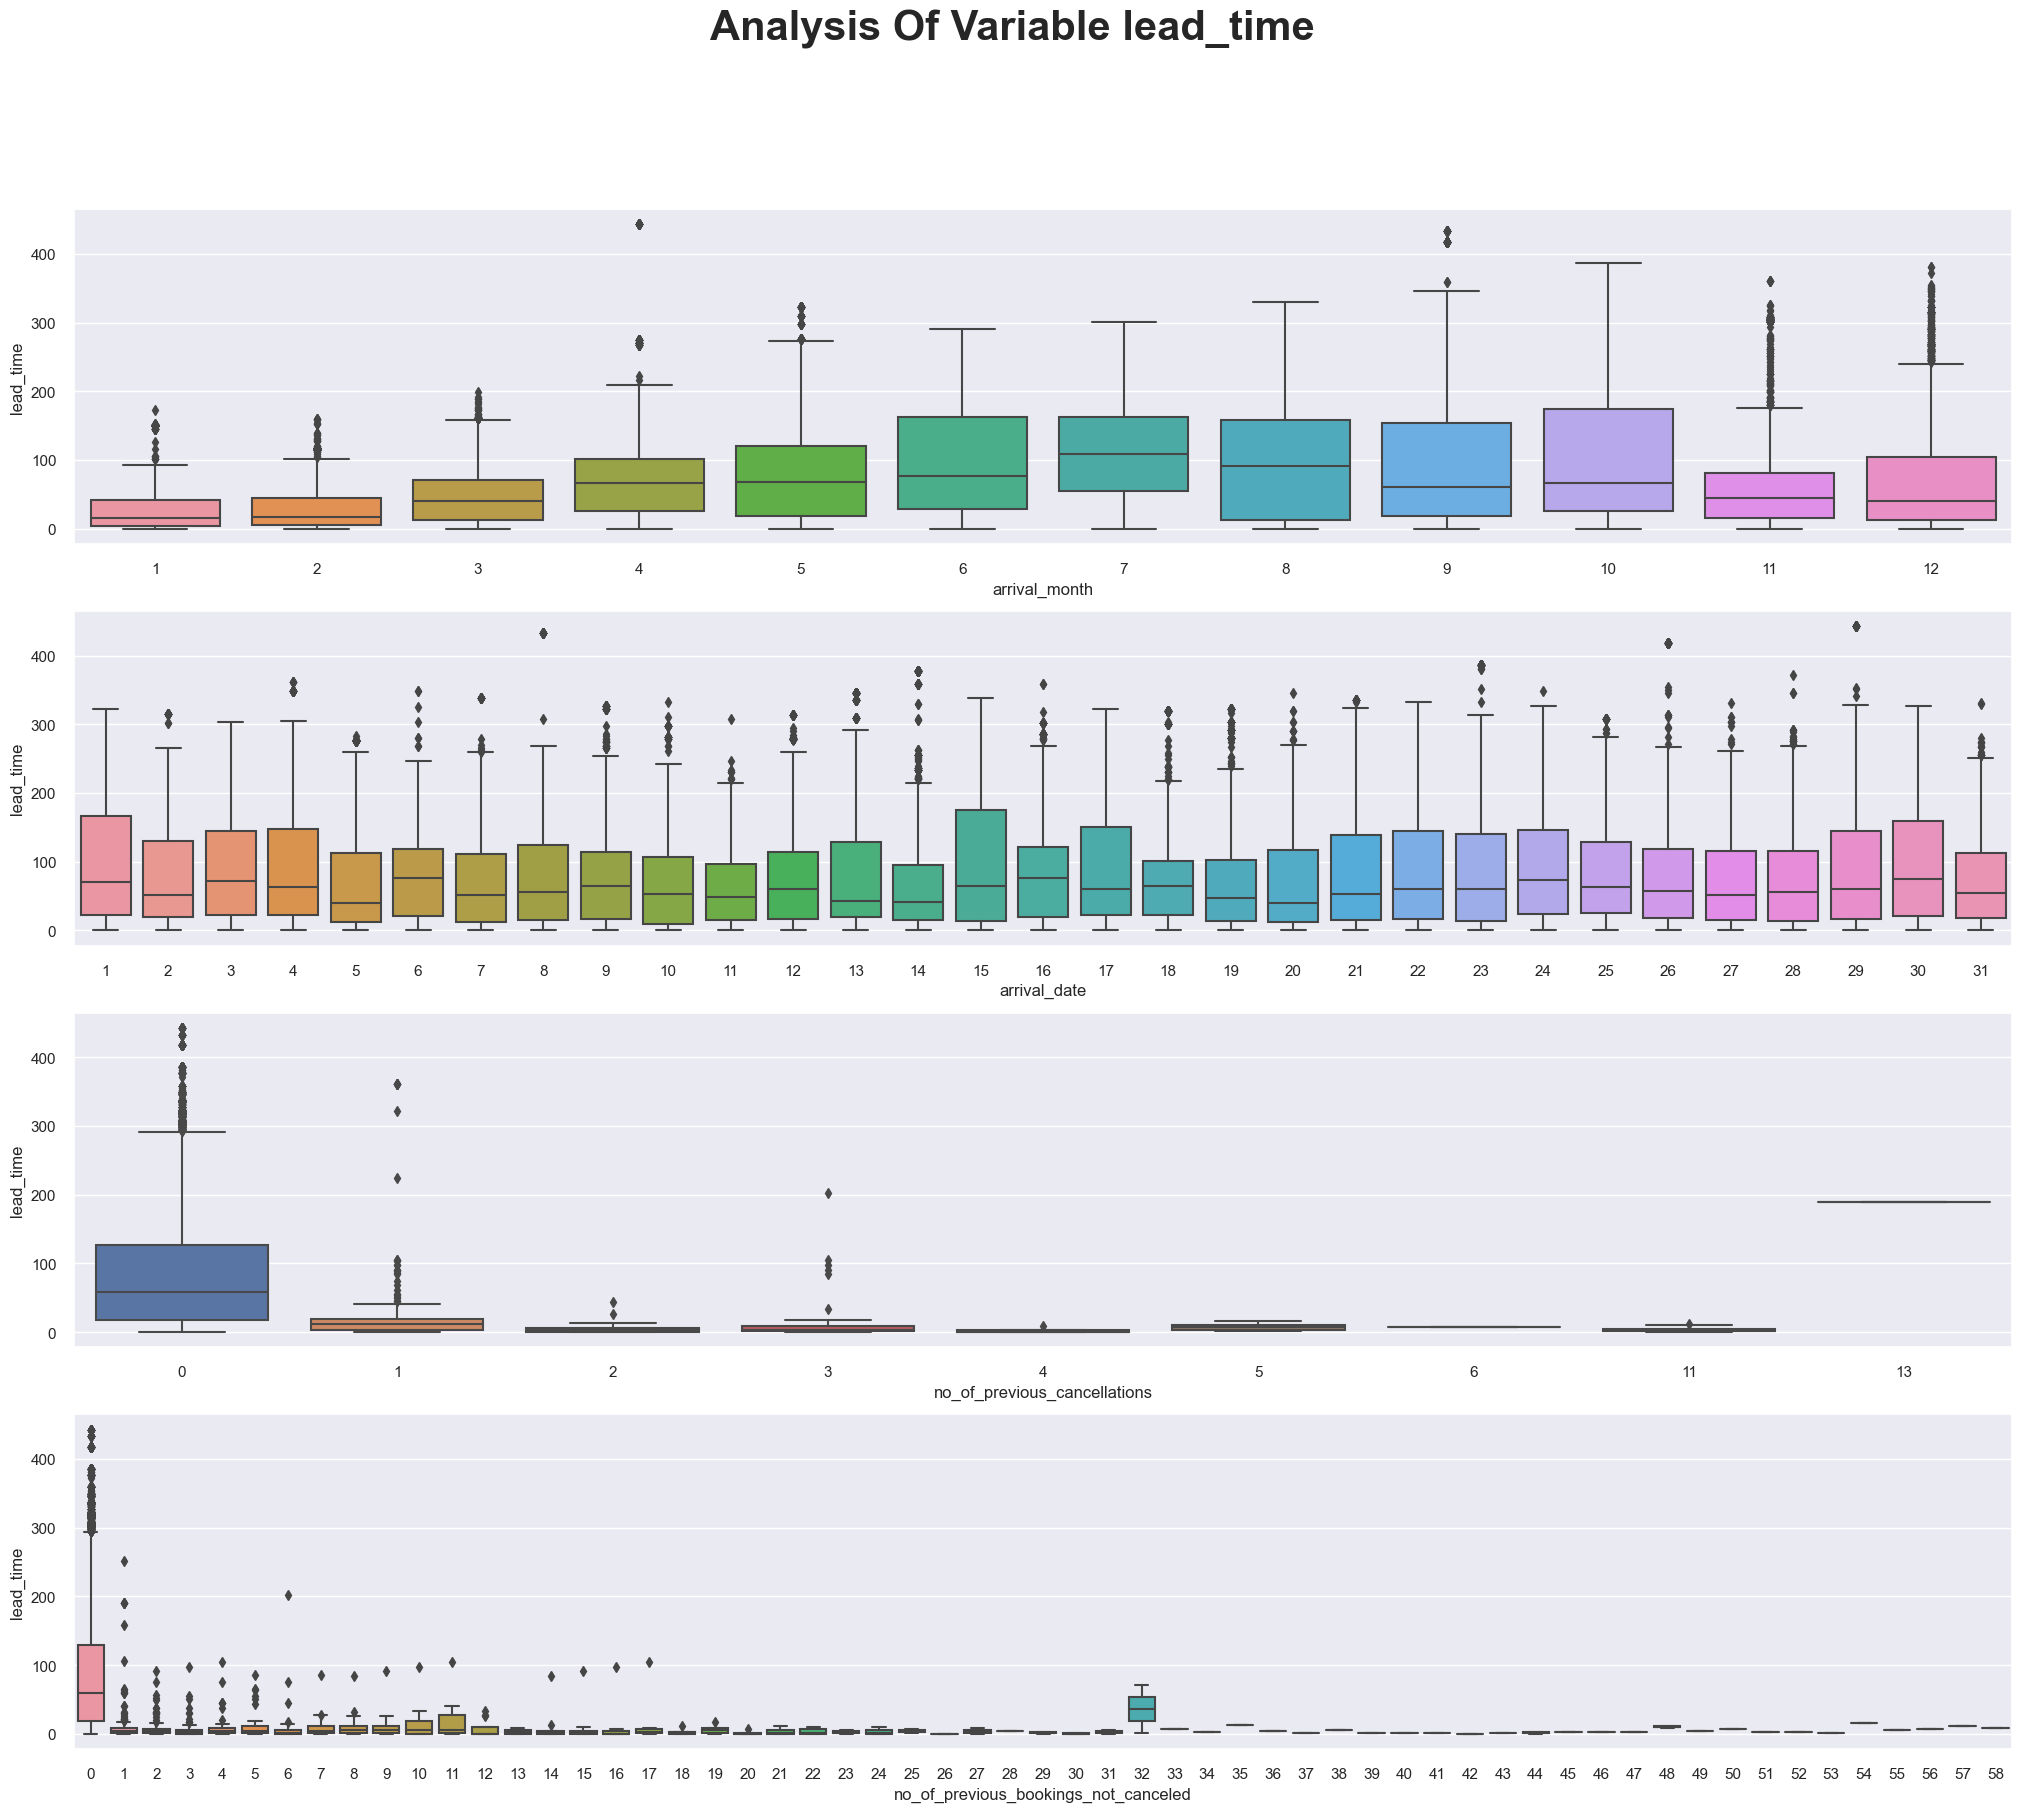

In [94]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=30)

plt.subplot(4,1,1)
sns.boxplot(x="arrival_month", y="lead_time", data=df)

plt.subplot(4,1,2)
sns.boxplot(x="arrival_date", y="lead_time", data=df)

plt.subplot(4,1,3)
sns.boxplot(x="no_of_previous_cancellations", y="lead_time", data=df)

plt.subplot(4,1,4)
sns.boxplot(x="no_of_previous_bookings_not_canceled", y="lead_time", data=df)

Dapat dilihat bahwa ada kecenderungan harga yang lebih tinggi x lead time yang lebih tinggi untuk pembatalan.

<AxesSubplot: xlabel='lead_time', ylabel='avg_price_per_room'>

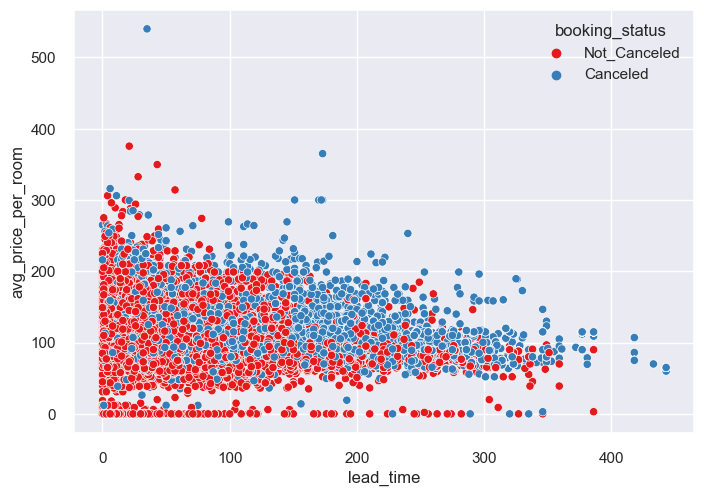

In [95]:
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'Set1', hue = 'booking_status')